In [ ]:
!pip install opendatasets
!pip install pandas
!pip install geopandas
!pip install plotly==5.3.1

Kaggle --> profile --> account --> API key

In [ ]:
# import required libraries
import opendatasets as od
import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go


In [ ]:
# Load dataset
od.download("https://www.kaggle.com/datasets/ajaygorkar/startup-analysis")

Skipping, found downloaded files in "./startup-analysis" (use force=True to force download)


In [ ]:
missing=["No Info","None","none"]
df = pd.read_csv('/content/startup-analysis/CAX_Startup_Data.csv',na_values=missing)


In [ ]:
# converting  Est. Founding Date and Last Funding Date from object to datetime
df["Est. Founding Date"]=pd.to_datetime(df["Est. Founding Date"])
df["Last Funding Date"]=pd.to_datetime(df["Last Funding Date"])
# converting Last round of funding received (in milionUSD) from object to float
# it is object variable because it consists of a string "unknown amount" in it,so replacing it with nan and converting
# the particular column to float
df["Last round of funding received (in milionUSD)"].replace({"unknown amount":np.nan},inplace=True)
df["Last round of funding received (in milionUSD)"] = df["Last round of funding received (in milionUSD)"].astype(float) 

In [ ]:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1)

In [ ]:
# Considering unique columns only, this removes the Data not available
cols = df["Country of company"].unique()

In [ ]:
df["Country of company"].value_counts()

United States         305
United Kingdom         33
India                  10
France                  8
Germany                 6
Belgium                 5
Spain                   5
Israel                  4
Denmark                 3
Bulgaria                3
Canada                  3
Austria                 2
Finland                 2
Switzerland             2
Argentina               2
Azerbaijan              2
Singapore               1
Italy                   1
Czech Republic          1
Russian Federation      1
Estonia                 1
Sweden                  1
Name: Country of company, dtype: int64

In [ ]:
# Plotting map
import plotly.graph_objs as go

data = [
    go.Choropleth(
        locations=["USA", "GBR", "IND", "FRA", "DEU", "BEL", "ESP", "ISR", "DNK", "BGR", "CAN", "AUT", "FIN", "CHE", "ARG", "AZE", "SGP", "ITA", "CZE", "RUS", "EST", "SWE"],
        z = [305, 33, 10, 8, 6, 5, 5, 4, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1],
        text = ["United States", "United Kingdom", "India", "France", "Germany", "Belgium", "Spain", "Israel", "Denmark", "Bulgaria", "Canada", "Austria", "Finland", "Switzerland", "Argentina", "Azerbaijan", "Singapore", "Italy", "Czech Republic", "Russian Federation", "Estonia", "Sweden"],
        colorscale = "Viridis",
        autocolorscale = False,
        reversescale = True,
        marker_line_color = "white",
        marker_line_width = 0.5,
        colorbar_title = "No. of companies in a country"
    )
]

layout = go.Layout(
    title = go.layout.Title(text="Number of Users by Country"),
    geo = dict(
        showframe=False,
        showcoastlines=False,
        projection_type="equirectangular"
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()
# Bluered, Portland, Viridis, Cividis,

In [ ]:
# renaming long column names to short ones :
df.rename(columns={'Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive'
                   :"Capital intensive business", 'Survival through recession, based on existence of the company through recession times':
                  "Survival through recession", "Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?"
                  :"Top forums talking about company/Model"},inplace=True)

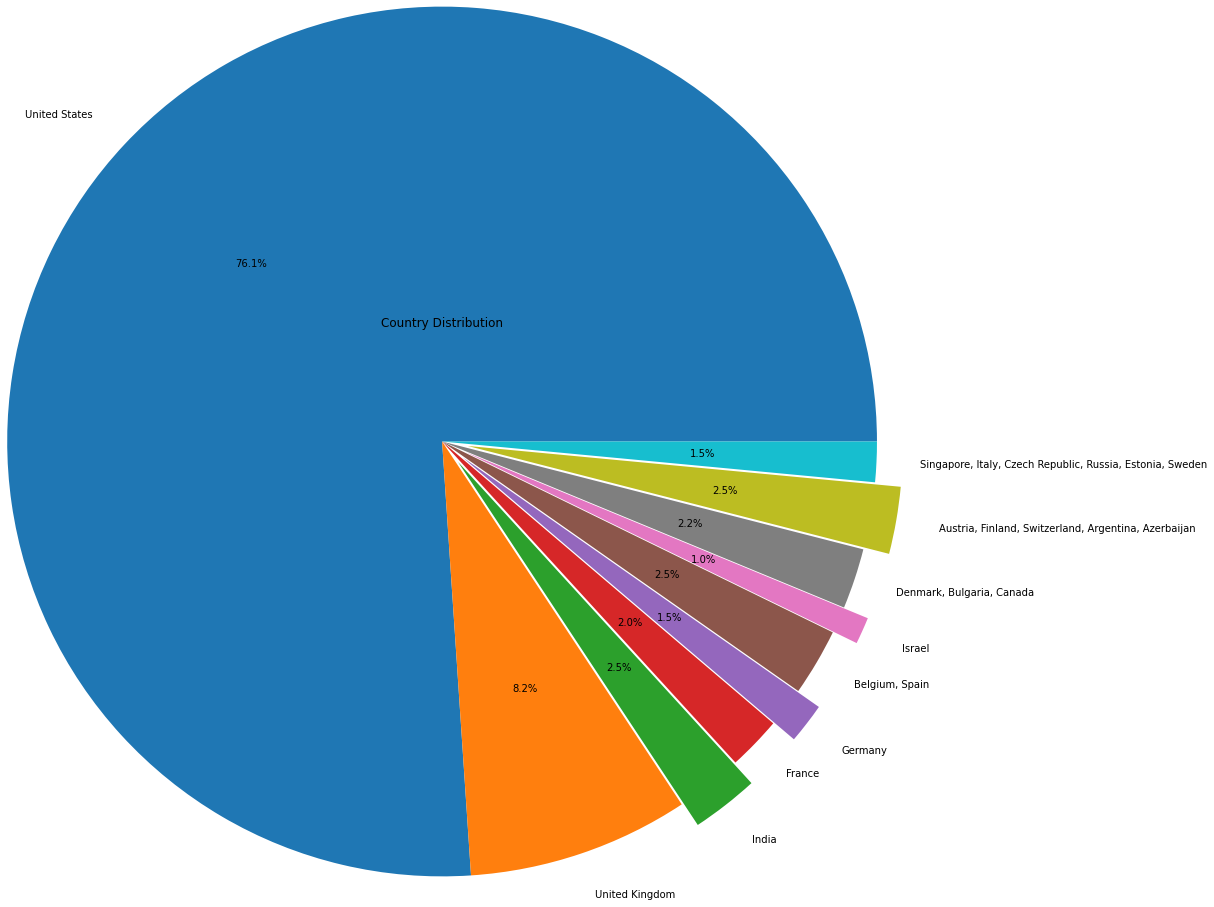

In [60]:
#                       pie plot                              #
data = {
    'United States': 305,
    'United Kingdom': 33,
    'India': 10,
    'France': 8,
    'Germany': 6,
    'Belgium, Spain': 10,
    'Israel': 4,
    'Denmark, Bulgaria, Canada': 9,
    'Austria, Finland, Switzerland, Argentina, Azerbaijan': 10,
    'Singapore, Italy, Czech Republic, Russia, Estonia, Sweden': 6
}

# Creating a pie chart
plt.pie(data.values(), labels=data.keys(), autopct='%1.1f%%',radius=5,explode = [0.0,0.0,0.3,0.0,0.3,0.0,0.3,0.0,0.3,0.0])
plt.title('Country Distribution')
plt.show()

Analysis of the above results:

The data contains more than 75% of U.S. based startups.
Although, there is 100% success rate as evident from the previous slide for countries like South America it only has 2 startups.
Country/ geographical location cannot be used as a valid attribute that could estimate the success of a startup based on this dataset.
